# NOTLAR


- HeatMap polarasyon analizinde çok sık kullanlıyor. Özelliklerin birbirleri arasındaki ilişkisini görmek için sıkça kullanılıyormuş
- Korelasyon değeri ne kadar 1'e yakın ise o kadar yüksek korelasyon söz konusudur. Ne kadar 0'a yakın ise o kadar düşük korelasyon söz konusudur.
- Korelasyon değerlerindeki artı ya da eksi işaretler korelasyon ilişkisinin doğru mu ya da ters mi olduğunu gösterir.  
- 0.5 üstü korelasyon ilişki vardır denilmesi için yeterlidir.
- Çok fazla feature sahibi bir dataset içerisinde korelasyonu yüksek olan sütunlardan bir tanesi silinebilirmiş. Sebebi ise maliyeti düşürmekmiş.
- Aynı zamanda yine korelasyonu yüksek sütunlardan bazılarının çıkarılması, modelin performansını ve genelleştirme yeteneğini artırır.
-Modelde birden fazla yüksek değerde korelasyon varsa ve bu korelasyonlardan hangisinin çıkartılması gerektiğini anlamak istersek, feature importance yapılmalı. Bu sayede hangi sütunun model için daha değersiz olduğunu tespit ederek veri seti içerisinden çıkartabilirsiniz.
?-Korelasyon analizi GetDummy ile yapılırsa değerlerde istenmeyen değişikler görülür mü? Bu sorunun cevabını tam alamadık.
- RandomForestClassifier, hocanın notlarından ne olduğunu bilmiyorum.
- Dinamik görselleştirme işlemi var, grafik üzerindeki noktalardan değerler rahatlıklar okunabiliyor.
-

In [ ]:
  # Hocanın Notlarından:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False))

In [ ]:
  #Hocanın Notlarından:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

In [ ]:
# Cinsiyete göre hayatta kalma oranı ve sayısını hesaplama
survival_summary = titanic.groupby('sex')['survived'].agg(['mean', 'count']).reset_index()

    # Burada reset_index kullanılmaz ise survival_summary dataframe'inin index kısmı sex sütunu olur. reset_index ile sex sütünunu index değil de sütun olarak göstermiş olursun

- Standarlaştırma veriseti eğitim ve test diye ikiye ayrıldıktan sonra gerçekleştirilme imiş. Aksi halde **veri sızıntısı** söz konusu oluyormuş.

In [ ]:
  # Kütüphaneleri yükleme işlemi
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Toplam Hesap (total_bill) ve Bahşiş (tip) Arasındaki İlişki

In [ ]:
df = sns.load_dataset("tips")
display(df.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


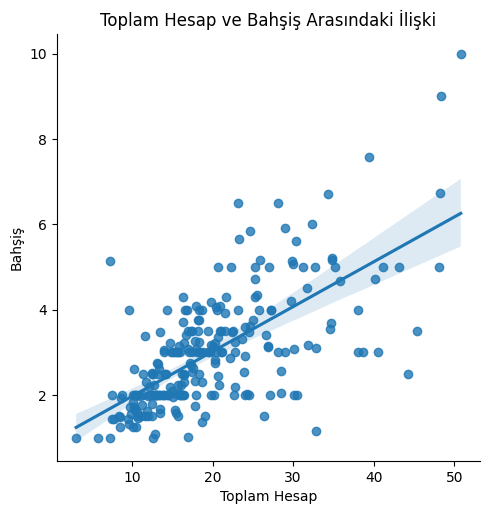

In [ ]:
  # Sütun bilgileri girilen sütunlar arasında scatter plot kullanarak doğrusal regresyon analizi yapıyor, aynı zamanda da regresyon çizgisi çekiyor.
sns.lmplot(x="total_bill", y="tip", data=df)
plt.title("Toplam Hesap ve Bahşiş Arasındaki İlişki")
plt.xlabel("Toplam Hesap")
plt.ylabel("Bahşiş")
plt.show()

- İki değişken arasında doğrusal regresyon bulunuyor, çıkarımı yapmak yanlış olmaz.

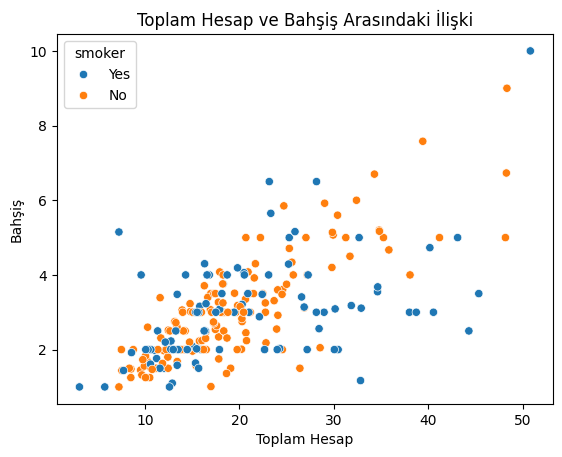

In [ ]:
  # Sütun bilgileri girilen sütunlar arasında sadece scatter plot işlemi uyguluyor. Herhangi bir regresyon analizi söz konusu değil.
sns.scatterplot(x="total_bill", y="tip", data=df, hue="smoker")
plt.title("Toplam Hesap ve Bahşiş Arasındaki İlişki")
plt.xlabel("Toplam Hesap")
plt.ylabel("Bahşiş")
plt.show()

Bahşiş ile Toplam Hesap arasında lineer anlamda bir regresyon olduğu görülmekte lakin grafikten de anlaşılacağı üzere aykırı değerler de söz konusu. Yani toplam hesap miktarı artıkça bahşiş de artıyor denebilir.

# 2. Günlere Göre Toplam Hesap Dağılımı

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = sns.load_dataset("tips")
display(df.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


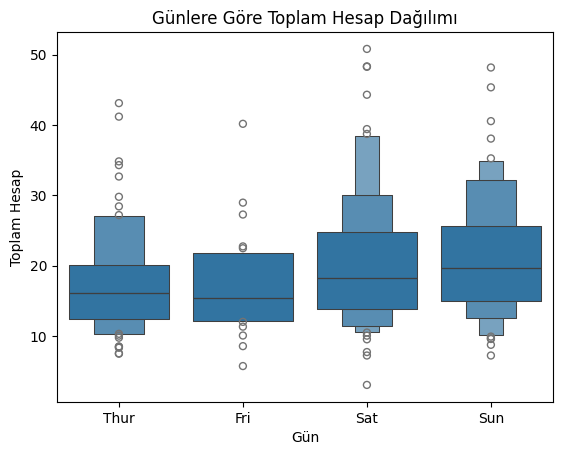

In [ ]:
sns.boxenplot(x="day", y="total_bill", data=df)
plt.title("Günlere Göre Toplam Hesap Dağılımı")
plt.xlabel("Gün")
plt.ylabel("Toplam Hesap")
plt.show()

- Klasik boxplot'dan biraz daha farklı bir görsel yapıya sahip. Çok rahat bir şekilde klasik boxplot tercihini yaparım. Bu grafik daha kötü.

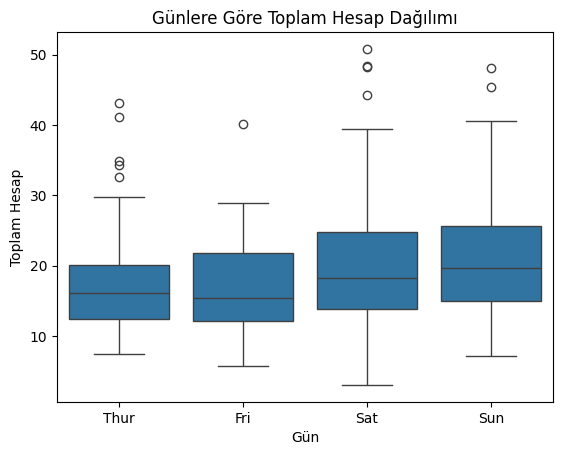

In [ ]:
sns.boxplot(x="day", y="total_bill", data=df)
plt.title("Günlere Göre Toplam Hesap Dağılımı")
plt.xlabel("Gün")
plt.ylabel("Toplam Hesap")
plt.show()

- Grafikten anlaşılacağı üzere aykırı değerler yükseklerde olacak şekilde bulunmakadır. Grafiklerin arasındaki renkli alanı bölen çizgiler ise medyanı ifade etmektedir.

In [ ]:
for i in df["day"].unique():
    if i == 'Sun':
        print('Sunday_Toplam_Hesap_Medyanı:', df[df['day'] == 'Sun']['total_bill'].median())
    if i == 'Sat':
        print('Saturday_Toplam_Hesap_Medyanı:', df[df['day'] == 'Sat']['total_bill'].median())
    if i == 'Fri':
        print('Friday_Toplam_Hesap_Medyanı:', df[df['day'] == 'Fri']['total_bill'].median())
    if i == 'Thur':
        print('Thursday_Toplam_Hesap_Medyanı:', df[df['day'] == 'Thur']['total_bill'].median())

Sunday_Toplam_Hesap_Medyanı: 19.63
Saturday_Toplam_Hesap_Medyanı: 18.24
Thursday_Toplam_Hesap_Medyanı: 16.2
Friday_Toplam_Hesap_Medyanı: 15.38


In [ ]:
medyan_degerler = df.groupby('day')['total_bill'].median()
  # day sütununa göre gruplama yapıyor ve herbir grup içerisinden total_bill medyanını hesaplıyor.

for gun, medyan in medyan_degerler.items():
    print(f'{gun}_Toplam_Hesap_Medyanı: {medyan}')

Thur_Toplam_Hesap_Medyanı: 16.2
Fri_Toplam_Hesap_Medyanı: 15.38
Sat_Toplam_Hesap_Medyanı: 18.24
Sun_Toplam_Hesap_Medyanı: 19.63


<ipython-input-28-12b7f0bce6ee>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medyan_degerler = df.groupby('day')['total_bill'].median()


In [ ]:
  # Günlere göre Total_Bill IQR hesaplanması:

# IQR hesaplama fonksiyonu
def calculate_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return IQR

# Günlere göre gruplama ve IQR hesaplama
iqr_values = df.groupby('day')['total_bill'].apply(calculate_iqr)
print(iqr_values)
type(iqr_values)

for day, iqr in iqr_values.items():
    print(f'{day}_Toplam_Hesap_IQR: {iqr}')

day
Thur     7.7125
Fri      9.6550
Sat     10.8350
Sun     10.6100
Name: total_bill, dtype: float64
Thur_Toplam_Hesap_IQR: 7.712500000000002
Fri_Toplam_Hesap_IQR: 9.655000000000001
Sat_Toplam_Hesap_IQR: 10.835
Sun_Toplam_Hesap_IQR: 10.610000000000001


<ipython-input-5-72ea71e567ee>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iqr_values = df.groupby('day')['total_bill'].apply(calculate_iqr)


In [ ]:
# IQR hesaplama fonksiyonu
def calculate_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR
      # Parametre olarak aldığı değerleri IQR'a çeviriyor. Örneğin, df[df['day'] == day]['total_bill'] içerisinden gelen total_bill değerlerine göre IQR hesaplıyor.

In [ ]:
# Verileri IQR sınırlarına çekme fonksiyonu
def limit_within_iqr(series, Q1, Q3):
    return series.clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)

In [ ]:
# Günlere göre gruplama ve IQR hesaplama
for day in df['day'].unique():
    Q1, Q3, IQR = calculate_iqr(df[df['day'] == day]['total_bill'])
    df.loc[df['day'] == day, 'total_bill'] = limit_within_iqr(df[df['day'] == day]['total_bill'], Q1, Q3)

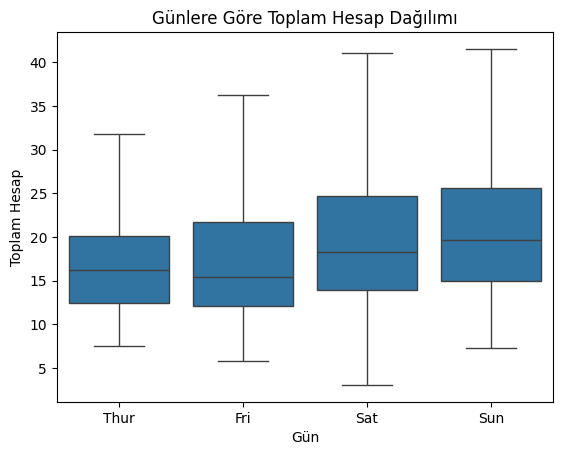

In [ ]:
sns.boxplot(x="day", y="total_bill", data=df)
plt.title("Günlere Göre Toplam Hesap Dağılımı")
plt.xlabel("Gün")
plt.ylabel("Toplam Hesap")
plt.show()

- Aykırı değerler dataset içersine çekilmiştir. Bu işlem diğer tüm ödev sorularında da geçerli kalacak şekilde ilerleme sağlanmıştır.

In [ ]:
a = calculate_iqr(df[df['day'] == day]['total_bill'])
type(a)

for day in df['day'].unique():
    Q1, Q3, IQR = calculate_iqr(df[df['day'] == day]['total_bill'])
    print(f'{day}_Toplam_Hesap_IQR: Q1={Q1}, Q3={Q3}, IQR={IQR}')

Sun_Toplam_Hesap_IQR: Q1=14.987499999999999, Q3=25.5975, IQR=10.610000000000001
Sat_Toplam_Hesap_IQR: Q1=13.905000000000001, Q3=24.740000000000002, IQR=10.835
Thur_Toplam_Hesap_IQR: Q1=12.442499999999999, Q3=20.155, IQR=7.712500000000002
Fri_Toplam_Hesap_IQR: Q1=12.094999999999999, Q3=21.75, IQR=9.655000000000001


IQR değerleri üzerinden hangi günde toplam hesap daha fazla bunu öğrenebiliriz. IQR değeri en fazla SATURDAY olduğu için bu gündeki toplam hesap en fazladır diyebiliriz.

In [ ]:
    # Ya da şöyle bir test de yapılabilir ama bu sefer aykırı değerler de değerlendirilmiş olunur:
import seaborn as sns
import pandas as pd
import seaborn as sns

df2 = sns.load_dataset("tips")

# Her bir gündeki total_bill sütununun toplamını hesaplama
total_bill_sums = df2.groupby('day')['total_bill'].sum()

for day, total in total_bill_sums.items():
      print(f'{day}_Toplam_Hesap: {total}')

Thur_Toplam_Hesap: 1096.33
Fri_Toplam_Hesap: 325.88
Sat_Toplam_Hesap: 1778.4
Sun_Toplam_Hesap: 1627.16


<ipython-input-56-d5da7a872a69>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_bill_sums = df2.groupby('day')['total_bill'].sum()


Aykırı değerler dahil bir şekilde hesaplama yapılsa da yine Saturday en fazla toplam fatura çıkan gün olmuş oluyor

# 3. Masa Büyüklüğüne Göre Bahşiş Oranları

In [ ]:
  # Yeni sütunun eklenmesi:
df['tip_rate'] = (df['tip'] / df['total_bill']) * 100

In [ ]:
display( df.head())

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


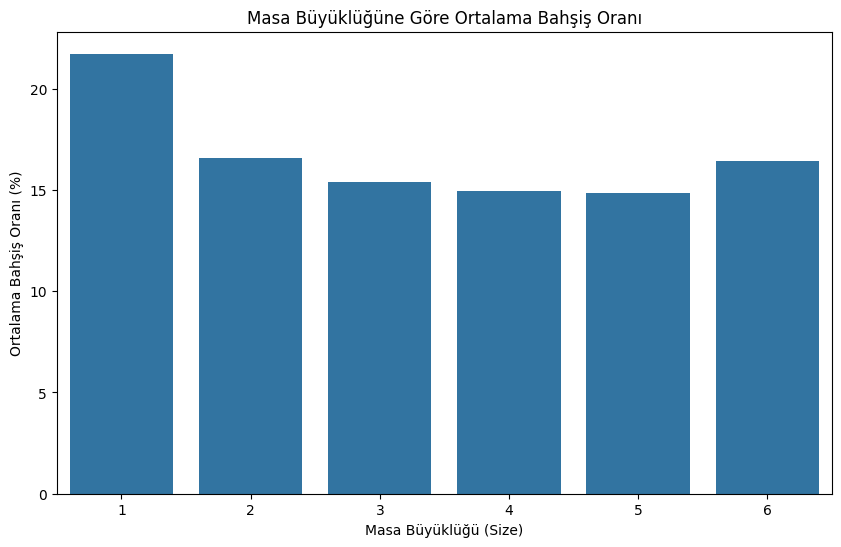

In [ ]:
    # Grafik ile görselleştirme işlemi:
plt.figure(figsize=(10, 6))
sns.barplot(x='size', y='tip_rate', data=df, errorbar=None)
plt.xlabel('Masa Büyüklüğü (Size)')
plt.ylabel('Ortalama Bahşiş Oranı (%)')
plt.title('Masa Büyüklüğüne Göre Ortalama Bahşiş Oranı')
plt.show()

- Bir kişilik masalarda verilen bahşiş en fazla, yani bu dataset için tek başına yemek yiyen kişiler daha fazla bahşiş veriyor olarak bir çıkarım yapılabilir.
- Masa sayısının yüksek olması o masadan çok bahşiş çıkacağı anlamına gelmiyor yani.
- Bu restoran için tek başına yemek yiyen kişiler zengin olabilir çıkarımı da yapılabilir.

In [ ]:
# Masa büyüklüğüne göre ortalama maaş miktarlarını hesaplama
average_total_bill_by_size = df.groupby('size')['tip_rate'].mean()

# Sayısal sonuçları yazdırma
print(average_total_bill_by_size)

size
1    21.729202
2    16.574875
3    15.370483
4    14.938261
5    14.873988
6    16.435659
Name: tip_rate, dtype: float64


Bu şekilde sayısal değerleri de görebiliriz.

# 4. Günün Zamanına Göre Bahşiş Dağılımı

In [ ]:
display(df.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


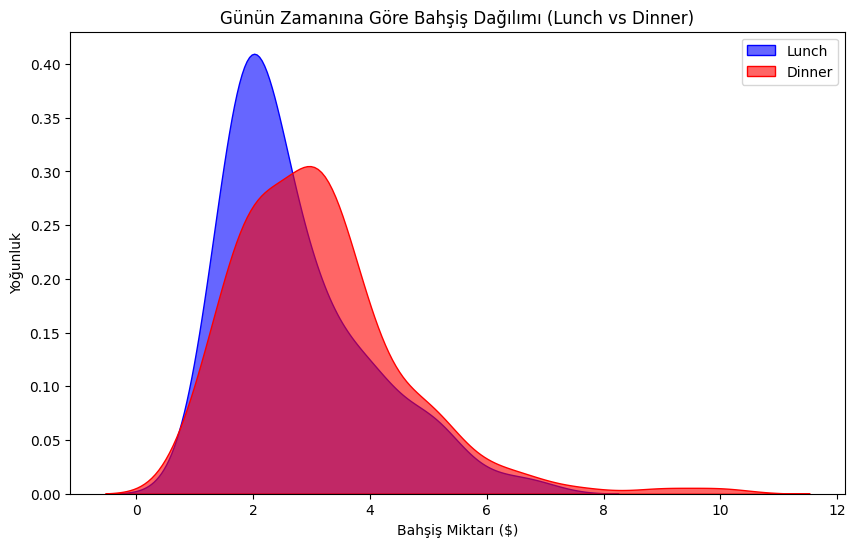

In [ ]:

plt.figure(figsize=(10, 6)) # 10 inç genişlik, 6 inç boy

    # Lunch değerine sahip tip verilerini seçiyor sonra grafiğe döküyor. Alpha değeri ise grafiğin şeffaflığını bildiriyor.
sns.kdeplot(data=df[df['time'] == 'Lunch'], x='tip', fill=True, label='Lunch', color='blue', alpha=0.6)
    # # Dinner değerine sahip tip verilerini seçiyor sonra grafiğe döküyor. Alpha değeri ise grafiğin şeffaflığını bildiriyor.
sns.kdeplot(data=df[df['time'] == 'Dinner'], x='tip', fill=True, label='Dinner', color='red', alpha=0.6)

plt.title('Günün Zamanına Göre Bahşiş Dağılımı (Lunch vs Dinner)')
plt.xlabel('Bahşiş Miktarı ($)')
plt.ylabel('Yoğunluk')
plt.legend()
plt.show()


- Öğle yemeği bahşişlerinin en yoğun olduğu zamanlarda alınan bahşişlerinin boyutu küçük seyrediyor.
- Yine akşam yemeği konusunda da bahşiş miktarı düşük seviyelerde ama öğle yemeğine göre daha uzun sürede olacak şekilde gerçekleşiyor.
- Akşam yemeği en yüksek aldığı bahşişler siparişlerin en az yoğunlukta gerçekleştiği aralıklarda gerçekleşiyor.
- Akşam yemeği, öğle yemeğine kıyasla daha yüksek bahşişler almıştır diyebiliriz.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Sayısal Değişkenler Arasındaki Korelasyon Analizi')
plt.show()

ValueError: could not convert string to float: 'No'

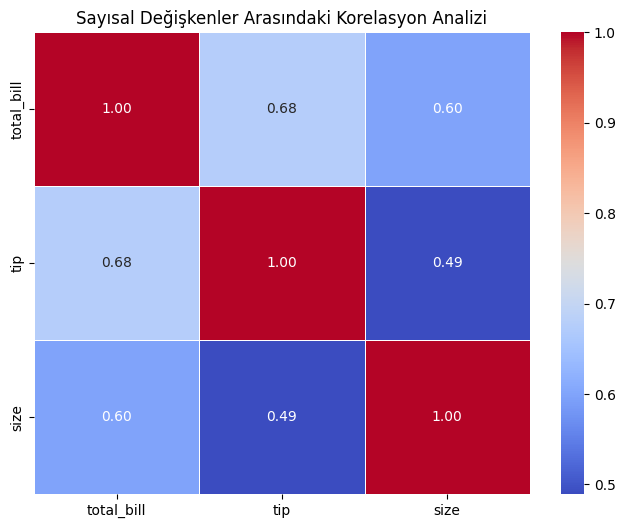

In [10]:

  # Yalnızca sayısal değişksütunlarıenleri seçelim
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Sayısal değişkenler arasındaki korelasyonu hesapla
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Sayısal Değişkenler Arasındaki Korelasyon Analizi')
plt.show()

    # annot=True kutucuklar içindeki sayısal değerleri veriyor
    # fmt='.2f' kutucuklar içindeki sayısal değerlerde virgülden sonra kaç basamak olacağını belirtiyor.

- Total_Bill ile Tip arasında kuvveli denebilcek seviyede doğrudan bir ilişki var. Yani biri artarsa diğeri de artacak, biri azalırsa diğeri de azalacak
- Tip ve Size arasında da az da olsa bir doğrudan ilişki bulunmakta. Ama önceki grafiklerde masada tek başına oturanların daha fazla bahşiş bıraktığı analizini yapmıştık. Çelişki olabilir.

In [14]:
import pandas as pd
    # Kategorik sütunları da heatmap içerisine dahil etmek istersek:
df_encoding=df.copy()
df_encoding.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
df_encoding = pd.get_dummies(df_encoding, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
df_encoding.head()
    # kategorik sütunlara dummy tuzağına yakalanmayacak şekilde one-hot encoding yapıyor.
    # drop_first ile de her bir kategorik değişkenden ilk uniqe veri değerini siliyor.

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True


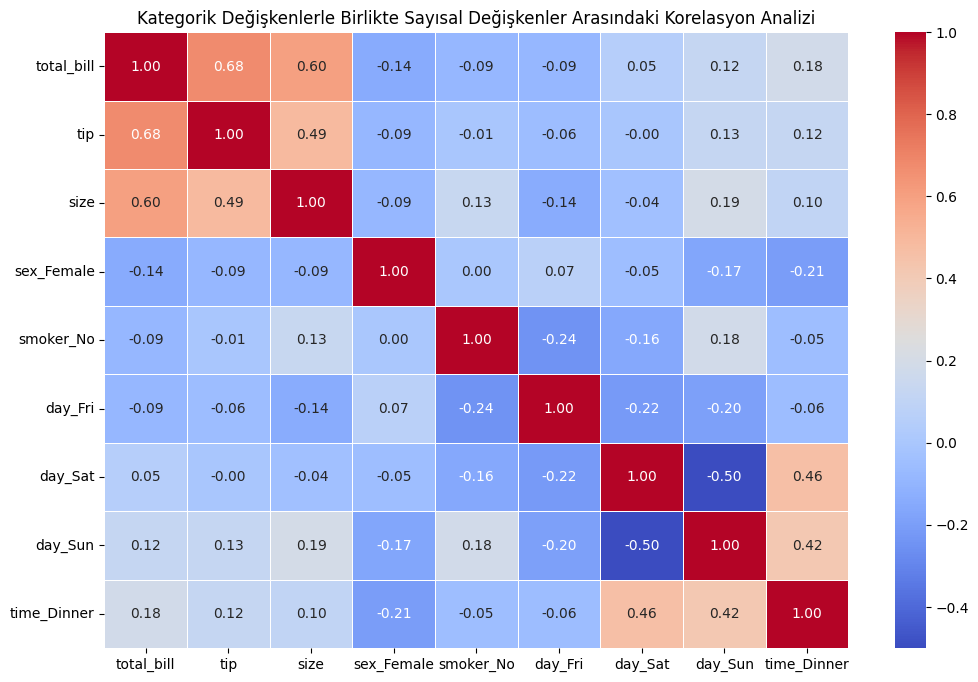

In [16]:
correlation_matrix = df_encoding.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Kategorik Değişkenlerle Birlikte Sayısal Değişkenler Arasındaki Korelasyon Analizi')
plt.show()

- Bu sayede tüm verilere ulaşabildik.
- Turuncu olanlar nispeten güçlü bağlara sahipken mavi olanların ilişkileri çok daha zayıf durumda diyebiliriz.